# EDA on football stats

There's a lot of EDA here understanding the format, so I'm starting with a notebook.

The data is downloaded from http://nflsavant.com/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

We have some big dataframes and we need to see the whole things.

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 200

In [3]:
yearly_df = []
for filename in ['pbp-2014.csv', 'pbp-2015.csv', 'pbp-2016.csv', 'pbp-2017.csv', 'pbp-2018.csv']:
    yearly_df.append(pd.read_csv('data/' + filename))
full_df = pd.concat(yearly_df, axis=0)

In [4]:
full_df.shape

(222864, 45)

Let's look at all the data for one game, sorted by time.

In [5]:
full_df[full_df.GameId==2018090902].sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False]).head(10)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
1841,2018090902,2018-09-09,1,15,0,IND,CIN,0,0,35,NaN,1,NaN,0,2-R.SANCHEZ KICKS 63 YARDS FROM IND 35 TO CIN 2. 12-A.ERICKSON TO CIN 30 FOR 28 YARDS (41-M.FARLEY; 23-K.MOORE II).,0,NaN,NaN,2018,0,UNDER CENTER,KICK OFF,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,35,OWN,0,NaN,0,NaN,0
1842,2018090902,2018-09-09,1,14,53,CIN,IND,1,10,30,NaN,0,NaN,0,(14:53) 28-J.MIXON UP THE MIDDLE TO CIN 37 FOR 7 YARDS (53-D.LEONARD).,0,NaN,NaN,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,30,OWN,0,NaN,0,NaN,0
1843,2018090902,2018-09-09,1,14,11,CIN,IND,2,3,37,NaN,1,NaN,0,(14:11) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT INTENDED FOR 28-J.MIXON INTERCEPTED BY 23-K.MOORE II AT CIN 39. 23-K.MOORE II TO CIN 7 FOR 32 YARDS (14-A.DALTON).,0,NaN,NaN,2018,32,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,37,OWN,0,NaN,0,NaN,0
25574,2018090902,2018-09-09,1,14,1,IND,CIN,1,7,93,NaN,0,NaN,0,"(14:01) 72-B.SMITH REPORTED IN AS ELIGIBLE. 20-J.WILKINS LEFT END TO CIN 4 FOR 3 YARDS (59-N.VIGIL, 97-G.ATKINS).",0,NaN,NaN,2018,3,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,7,OPP,0,NaN,0,NaN,0
25575,2018090902,2018-09-09,1,13,23,IND,CIN,2,4,96,NaN,0,NaN,0,"(13:23) (SHOTGUN) 12-A.LUCK PASS INCOMPLETE SHORT LEFT TO 21-N.HINES (22-W.JACKSON). PENALTY ON IND-56-Q.NELSON, OFFENSIVE HOLDING, 10 YARDS, ENFORCED AT CIN 4 - NO PLAY.",0,NaN,NaN,2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,NaN,0,0,0,1,0,0,NaN,4,OPP,1,IND,1,OFFENSIVE HOLDING,10
25576,2018090902,2018-09-09,1,13,18,IND,CIN,2,14,86,NaN,0,NaN,0,(13:18) (SHOTGUN) 12-A.LUCK PASS SHORT LEFT INTENDED FOR 84-J.DOYLE INTERCEPTED BY 52-P.BROWN AT CIN 5. 52-P.BROWN TO CIN 7 FOR 2 YARDS (21-N.HINES).,0,NaN,NaN,2018,2,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,14,OPP,0,NaN,0,NaN,0
1844,2018090902,2018-09-09,1,13,10,CIN,IND,1,10,7,NaN,0,NaN,0,(13:10) 28-J.MIXON RIGHT GUARD TO CIN 11 FOR 4 YARDS (53-D.LEONARD).,0,NaN,NaN,2018,4,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,RIGHT GUARD,7,OWN,0,NaN,0,NaN,0
1845,2018090902,2018-09-09,1,12,32,CIN,IND,2,6,11,NaN,1,NaN,0,(12:32) 14-A.DALTON PASS SHORT RIGHT TO 85-T.EIFERT PUSHED OB AT CIN 40 FOR 29 YARDS (29-M.HOOKER).,0,NaN,NaN,2018,29,UNDER CENTER,PASS,0,1,0,0,SHORT RIGHT,0,0,0,NaN,0,0,0,0,0,0,NaN,11,OWN,0,NaN,0,NaN,0
1846,2018090902,2018-09-09,1,11,55,CIN,IND,1,10,40,NaN,0,NaN,0,(11:55) 28-J.MIXON LEFT END TO CIN 47 FOR 7 YARDS (53-D.LEONARD).,0,NaN,NaN,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,40,OWN,0,NaN,0,NaN,0
1847,2018090902,2018-09-09,1,11,17,CIN,IND,2,3,47,NaN,1,NaN,0,(11:17) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT TO 28-J.MIXON TO IND 32 FOR 21 YARDS (26-C.GEATHERS).,0,NaN,NaN,2018,21,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,47,OWN,0,NaN,0,NaN,0


TeamWin and NextScore are always 0, and the Unnamed columns are always NaN, so we'll drop them.

In [6]:
full_df[full_df.TeamWin != 0]

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards


In [7]:
full_df[full_df.NextScore != 0]

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards


In [8]:
full_df[~(full_df['Unnamed: 10'].isna() & full_df['Unnamed: 12'].isna() & full_df['Unnamed: 16'].isna() & full_df['Unnamed: 17'].isna())]

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards


Fifth quarter is probably overtime, so that will need to be considered in the graph.

In [9]:
full_df.Quarter.value_counts()

2    61959
4    61494
3    49256
1    48582
5     1573
Name: Quarter, dtype: int64

Note for the
  * end of quarter/half/game
  * timeout
  * two-minute warning

the OffenseTeam is NaN.

In [10]:
full_df[(full_df.Minute==0) & (full_df.Second==0)].OffenseTeam[1]

1    NaN
1    NaN
1    NaN
Name: OffenseTeam, dtype: object

In [11]:
full_df[full_df.OffenseTeam.isna() &
        (full_df.PlayType != 'TIMEOUT') &
        (full_df.Description != 'TWO-MINUTE WARNING') &
        (full_df.Description != 'END GAME') &
        (full_df.Description != 'END QUARTER 1') &
        (full_df.Description != 'END QUARTER 2') &
        (full_df.Description != 'END QUARTER 3')]

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
11,2014091400,2014-09-14,3,0,0,NaN,MIA,0,0,0,NaN,1,NaN,0,END OF QUARTER - 3.25 PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
39,2014092112,2014-09-21,4,0,0,NaN,DEN,0,0,0,NaN,1,NaN,0,END QUARTER 4,0,NaN,NaN,2014,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
627,2014090702,2014-09-07,1,11,29,NaN,BUF,0,0,0,NaN,1,NaN,0,TIMEOUT AT 11:29.,0,NaN,NaN,2014,0,UNDER CENTER,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
639,2014090702,2014-09-07,1,6,47,NaN,BUF,0,0,0,NaN,1,NaN,0,TIMEOUT AT 06:47.,0,NaN,NaN,2014,0,UNDER CENTER,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
674,2014090702,2014-09-07,2,6,4,NaN,BUF,0,0,0,NaN,1,NaN,0,TIMEOUT AT 06:04.,0,NaN,NaN,2014,0,UNDER CENTER,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
708,2014090702,2014-09-07,3,9,34,NaN,BUF,0,0,0,NaN,1,NaN,0,TIMEOUT AT 09:34.,0,NaN,NaN,2014,0,UNDER CENTER,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
718,2014090702,2014-09-07,3,5,13,NaN,BUF,0,0,0,NaN,1,NaN,0,TIMEOUT AT 05:13.,0,NaN,NaN,2014,0,UNDER CENTER,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
777,2014090702,2014-09-07,4,0,0,NaN,BUF,0,0,0,NaN,1,NaN,0,END QUARTER 4,0,NaN,NaN,2014,0,NaN,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
2657,2014090801,2014-09-08,3,5,26,NaN,SD,0,0,0,NaN,1,NaN,0,TIMEOUT AT 05:26.,0,NaN,NaN,2014,0,UNDER CENTER,NaN,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
2923,2014091400,2014-09-14,1,0,0,NaN,MIA,0,0,0,NaN,1,NaN,0,END OF QUARTER - 1.46 PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0


Except the data isn't quite clean. What's PlayType EXCEPTION?

In [12]:
full_df[full_df.PlayType == 'EXCEPTION']

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,Unnamed: 10,SeriesFirstDown,Unnamed: 12,NextScore,Description,TeamWin,Unnamed: 16,Unnamed: 17,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards
11,2014091400,2014-09-14,3,0,0,NaN,MIA,0,0,0,NaN,1,NaN,0,END OF QUARTER - 3.25 PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
2923,2014091400,2014-09-14,1,0,0,NaN,MIA,0,0,0,NaN,1,NaN,0,END OF QUARTER - 1.46 PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
2968,2014091400,2014-09-14,2,0,0,NaN,MIA,0,0,0,NaN,1,NaN,0,END OF HALF - 2.27 PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
3066,2014091400,2014-09-14,4,0,0,NaN,MIA,0,0,0,NaN,1,NaN,0,END OF QUARTER - 4.09 PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
4398,2014091409,2014-09-14,2,0,0,NaN,LA,0,0,0,NaN,1,NaN,0,THE GAME HAS BEEN SUSPENDED. LIGHTNING 5:04PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
4399,2014091409,2014-09-14,2,0,0,NaN,LA,0,0,0,NaN,1,NaN,0,THE GAME HAS RESUMED. 5:55PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
5551,2014092100,2014-09-21,1,0,0,NaN,SD,0,0,0,NaN,1,NaN,0,END OF QUARTER - 1.35 PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
5599,2014092100,2014-09-21,2,0,0,NaN,SD,0,0,0,NaN,1,NaN,0,END OF HALF - 2.25 PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
5637,2014092100,2014-09-21,3,0,0,NaN,SD,0,0,0,NaN,1,NaN,0,END OF QUARTER - 3.10 PM,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,0,OWN,0,NaN,0,NaN,0
6484,2014092106,2014-09-21,2,12,15,MIN,NO,1,10,37,NaN,0,NaN,0,(12:15) NEW QUARTERBACK FOR THE VIKINGS IS #5 T.BRIDGEWATER. CASSEL WAS TAKEN OFF THE FIELD ON A STRETCHER DURING THE SAINTS PRECEEDING OFFENSIVE SERIES. 84-C.PATTERSON LEFT END TO MIN 30 FOR -7 ...,0,NaN,NaN,2014,0,UNDER CENTER,EXCEPTION,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,37,OWN,0,NaN,0,NaN,0


Let's start graphing!

In [13]:
#df = full_df[full_df.GameId==2018090900].sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False]).reset_index(drop=True)
df = full_df[full_df.GameId==2018090902].sort_values(['Quarter', 'Minute', 'Second'], ascending=[True, False, False]).reset_index(drop=True)

In [14]:
def add_time_column(df):
    """Add column for number of seconds into game"""
    df['Time'] = (df.Quarter-1)*60*15 + (15-df.Minute)*60 - df.Second

# this hardcoding is really bad
def add_yards_column(df, team1 = 'IND'):
    """Add column Fixed Yards, but with directions reversed for quarters 2 and 4
    (so they teams go in the same direction)"""
    df['Position'] = df.YardLine - 50
    df.Position *= (df.DefenseTeam==team1)*2 - 1
    df.Position += 50

def drop_useless_columns(df):
    "Drop columns that are always NaN"
    df.drop(['Unnamed: 10', 'Unnamed: 12', 'Unnamed: 16', 'Unnamed: 17', 'TeamWin'], axis=1, inplace=True)

In [15]:
add_time_column(df)
add_yards_column(df)
drop_useless_columns(df)

In [16]:
df.head(10)

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Time,Position
0,2018090902,2018-09-09,1,15,0,IND,CIN,0,0,35,1,0,2-R.SANCHEZ KICKS 63 YARDS FROM IND 35 TO CIN 2. 12-A.ERICKSON TO CIN 30 FOR 28 YARDS (41-M.FARLEY; 23-K.MOORE II).,2018,0,UNDER CENTER,KICK OFF,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,35,OWN,0,NaN,0,NaN,0,0,65
1,2018090902,2018-09-09,1,14,53,CIN,IND,1,10,30,0,0,(14:53) 28-J.MIXON UP THE MIDDLE TO CIN 37 FOR 7 YARDS (53-D.LEONARD).,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,CENTER,30,OWN,0,NaN,0,NaN,0,7,30
2,2018090902,2018-09-09,1,14,11,CIN,IND,2,3,37,1,0,(14:11) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT INTENDED FOR 28-J.MIXON INTERCEPTED BY 23-K.MOORE II AT CIN 39. 23-K.MOORE II TO CIN 7 FOR 32 YARDS (14-A.DALTON).,2018,32,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,37,OWN,0,NaN,0,NaN,0,49,37
3,2018090902,2018-09-09,1,14,1,IND,CIN,1,7,93,0,0,"(14:01) 72-B.SMITH REPORTED IN AS ELIGIBLE. 20-J.WILKINS LEFT END TO CIN 4 FOR 3 YARDS (59-N.VIGIL, 97-G.ATKINS).",2018,3,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,7,OPP,0,NaN,0,NaN,0,59,7
4,2018090902,2018-09-09,1,13,23,IND,CIN,2,4,96,0,0,"(13:23) (SHOTGUN) 12-A.LUCK PASS INCOMPLETE SHORT LEFT TO 21-N.HINES (22-W.JACKSON). PENALTY ON IND-56-Q.NELSON, OFFENSIVE HOLDING, 10 YARDS, ENFORCED AT CIN 4 - NO PLAY.",2018,0,SHOTGUN,PASS,0,1,1,0,SHORT LEFT,0,0,0,NaN,0,0,0,1,0,0,NaN,4,OPP,1,IND,1,OFFENSIVE HOLDING,10,97,4
5,2018090902,2018-09-09,1,13,18,IND,CIN,2,14,86,0,0,(13:18) (SHOTGUN) 12-A.LUCK PASS SHORT LEFT INTENDED FOR 84-J.DOYLE INTERCEPTED BY 52-P.BROWN AT CIN 5. 52-P.BROWN TO CIN 7 FOR 2 YARDS (21-N.HINES).,2018,2,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,1,0,0,0,0,NaN,14,OPP,0,NaN,0,NaN,0,102,14
6,2018090902,2018-09-09,1,13,10,CIN,IND,1,10,7,0,0,(13:10) 28-J.MIXON RIGHT GUARD TO CIN 11 FOR 4 YARDS (53-D.LEONARD).,2018,4,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,RIGHT GUARD,7,OWN,0,NaN,0,NaN,0,110,7
7,2018090902,2018-09-09,1,12,32,CIN,IND,2,6,11,1,0,(12:32) 14-A.DALTON PASS SHORT RIGHT TO 85-T.EIFERT PUSHED OB AT CIN 40 FOR 29 YARDS (29-M.HOOKER).,2018,29,UNDER CENTER,PASS,0,1,0,0,SHORT RIGHT,0,0,0,NaN,0,0,0,0,0,0,NaN,11,OWN,0,NaN,0,NaN,0,148,11
8,2018090902,2018-09-09,1,11,55,CIN,IND,1,10,40,0,0,(11:55) 28-J.MIXON LEFT END TO CIN 47 FOR 7 YARDS (53-D.LEONARD).,2018,7,UNDER CENTER,RUSH,1,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,LEFT END,40,OWN,0,NaN,0,NaN,0,185,40
9,2018090902,2018-09-09,1,11,17,CIN,IND,2,3,47,1,0,(11:17) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT TO 28-J.MIXON TO IND 32 FOR 21 YARDS (26-C.GEATHERS).,2018,21,SHOTGUN,PASS,0,1,0,0,SHORT LEFT,0,0,0,NaN,0,0,0,0,0,0,NaN,47,OWN,0,NaN,0,NaN,0,223,47


In [17]:
df[['YardLineDirection', 'OffenseTeam', 'DefenseTeam', 'PlayType', 'Down', 'YardLine', 'Yards', 'Description']]

,YardLineDirection,OffenseTeam,DefenseTeam,PlayType,Down,YardLine,Yards,Description
0,OWN,IND,CIN,KICK OFF,0,35,0,2-R.SANCHEZ KICKS 63 YARDS FROM IND 35 TO CIN 2. 12-A.ERICKSON TO CIN 30 FOR 28 YARDS (41-M.FARLEY; 23-K.MOORE II).
1,OWN,CIN,IND,RUSH,1,30,7,(14:53) 28-J.MIXON UP THE MIDDLE TO CIN 37 FOR 7 YARDS (53-D.LEONARD).
2,OWN,CIN,IND,PASS,2,37,32,(14:11) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT INTENDED FOR 28-J.MIXON INTERCEPTED BY 23-K.MOORE II AT CIN 39. 23-K.MOORE II TO CIN 7 FOR 32 YARDS (14-A.DALTON).
3,OPP,IND,CIN,RUSH,1,93,3,"(14:01) 72-B.SMITH REPORTED IN AS ELIGIBLE. 20-J.WILKINS LEFT END TO CIN 4 FOR 3 YARDS (59-N.VIGIL, 97-G.ATKINS)."
4,OPP,IND,CIN,PASS,2,96,0,"(13:23) (SHOTGUN) 12-A.LUCK PASS INCOMPLETE SHORT LEFT TO 21-N.HINES (22-W.JACKSON). PENALTY ON IND-56-Q.NELSON, OFFENSIVE HOLDING, 10 YARDS, ENFORCED AT CIN 4 - NO PLAY."
5,OPP,IND,CIN,PASS,2,86,2,(13:18) (SHOTGUN) 12-A.LUCK PASS SHORT LEFT INTENDED FOR 84-J.DOYLE INTERCEPTED BY 52-P.BROWN AT CIN 5. 52-P.BROWN TO CIN 7 FOR 2 YARDS (21-N.HINES).
6,OWN,CIN,IND,RUSH,1,7,4,(13:10) 28-J.MIXON RIGHT GUARD TO CIN 11 FOR 4 YARDS (53-D.LEONARD).
7,OWN,CIN,IND,PASS,2,11,29,(12:32) 14-A.DALTON PASS SHORT RIGHT TO 85-T.EIFERT PUSHED OB AT CIN 40 FOR 29 YARDS (29-M.HOOKER).
8,OWN,CIN,IND,RUSH,1,40,7,(11:55) 28-J.MIXON LEFT END TO CIN 47 FOR 7 YARDS (53-D.LEONARD).
9,OWN,CIN,IND,PASS,2,47,21,(11:17) (SHOTGUN) 14-A.DALTON PASS SHORT LEFT TO 28-J.MIXON TO IND 32 FOR 21 YARDS (26-C.GEATHERS).


There are a bunch of play types; we should handle all...eventually.

In [18]:
df.PlayType.value_counts()

PASS           86
RUSH           44
KICK OFF       13
TIMEOUT         7
EXTRA POINT     6
FIELD GOAL      6
SACK            5
PUNT            4
SCRAMBLE        3
NO PLAY         1
Name: PlayType, dtype: int64

Apparently there's no field to specify if the field goal is good; it's only in the Description field.

In [19]:
df[df.PlayType == 'FIELD GOAL']

,GameId,GameDate,Quarter,Minute,Second,OffenseTeam,DefenseTeam,Down,ToGo,YardLine,SeriesFirstDown,NextScore,Description,SeasonYear,Yards,Formation,PlayType,IsRush,IsPass,IsIncomplete,IsTouchdown,PassType,IsSack,IsChallenge,IsChallengeReversed,Challenger,IsMeasurement,IsInterception,IsFumble,IsPenalty,IsTwoPointConversion,IsTwoPointConversionSuccessful,RushDirection,YardLineFixed,YardLineDirection,IsPenaltyAccepted,PenaltyTeam,IsNoPlay,PenaltyType,PenaltyYards,Time,Position
15,2018090902,2018-09-09,1,8,25,CIN,IND,4,12,76,0,0,"(8:25) 4-R.BULLOCK 42 YARD FIELD GOAL IS GOOD, CENTER-46-C.HARRIS, HOLDER-10-K.HUBER.",2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,24,OPP,0,NaN,0,NaN,0,395,76
31,2018090902,2018-09-09,1,1,27,IND,CIN,4,3,97,0,0,"(1:27) 4-A.VINATIERI 21 YARD FIELD GOAL IS GOOD, CENTER-46-L.RHODES, HOLDER-2-R.SANCHEZ.",2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,3,OPP,0,NaN,0,NaN,0,813,3
64,2018090902,2018-09-09,2,3,6,IND,CIN,4,5,80,0,0,"(3:06) 4-A.VINATIERI 38 YARD FIELD GOAL IS GOOD, CENTER-46-L.RHODES, HOLDER-2-R.SANCHEZ.",2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,20,OPP,0,NaN,0,NaN,0,1614,20
87,2018090902,2018-09-09,2,0,6,IND,CIN,3,7,67,0,0,"(:06) 4-A.VINATIERI 51 YARD FIELD GOAL IS GOOD, CENTER-46-L.RHODES, HOLDER-2-R.SANCHEZ.",2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,33,OPP,0,NaN,0,NaN,0,1794,33
130,2018090902,2018-09-09,3,0,17,IND,CIN,4,14,63,0,0,"(:17) 4-A.VINATIERI 55 YARD FIELD GOAL IS NO GOOD, SHORT, CENTER-46-L.RHODES, HOLDER-2-R.SANCHEZ.",2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,37,OPP,0,NaN,0,NaN,0,2683,37
161,2018090902,2018-09-09,4,4,1,CIN,IND,4,10,79,0,0,"(4:01) 4-R.BULLOCK 39 YARD FIELD GOAL IS GOOD, CENTER-46-C.HARRIS, HOLDER-10-K.HUBER.",2018,0,FIELD GOAL,FIELD GOAL,0,0,0,0,NaN,0,0,0,NaN,0,0,0,0,0,0,NaN,21,OPP,0,NaN,0,NaN,0,3359,79


In [20]:
def plot_game(ax, df):
    last_pos = None
    last_time = None
    last_type = None
    scores = [0,0]
    for i, row in df.iterrows():
        #TODO fix this
        index = 0 if row.DefenseTeam == 'IND' else 1
        endzone = 100 if row.DefenseTeam == 'IND' else 0
        # to do: add Color to df
        color = 'r' if row.OffenseTeam == 'IND' else 'b'
    
        if row.PlayType == 'KICK OFF':
            ax.scatter([row.Time], [row.Position], marker="*", s=50, color=color)
            if last_type is not None:
                ax.plot([last_time, row.Time], [last_pos, endzone], color=last_color, lw=0.5)
        elif row.PlayType == 'NaN' or row.PlayType == 'TIMEOUT':
            continue
        else:
            if row.Down == 1:
                ax.scatter([row.Time], [row.Position], marker="o", color=color)
            else:
                ax.scatter([row.Time], [row.Position], marker=".", color=color, lw=0.5)
            ax.plot([last_time, row.Time], [last_pos, row.Position], color=last_color, lw=0.5)
        
        # draw scores
        if row.IsTouchdown:
            # need ot handle extra point(s)
            scores[index] += 7
            ax.text(row.Time, 1.1*(endzone-50)+50, scores[index], fontweight='bold')
        if row.PlayType == 'FIELD GOAL':
            # need to check if good
            scores[index] += 3
            ax.text(row.Time, 1.1*(endzone-50)+50, scores[index], fontweight='bold')
        
        last_time = row.Time
        last_pos = row.Position
        last_type = row.PlayType
        last_color = color
    ax.axvline(15*60, color='k', lw=1)             # ends of quarters
    ax.axvline(2*15*60, color='k')
    ax.axvline(3*15*60, color='k', lw=1)
    ax.axvline(28*60, color='grey', lw=0.5)  # two-minute warning
    ax.axvline(58*60, color='grey', lw=0.5)
    for line in range(10, 100, 10):
        ax.axhline(line, color='k', lw=0.3)
    ax.axhline(0, color='k', lw=0.5)
    ax.axhline(100, color='k', lw=0.5)
    ax.axhline(50, color='k', lw=0.5)
    
    xticks = np.array([0, 5, 10, 15, 20, 25, 28]) + np.array([[0], [30]])
    xticks = xticks.flatten() * 60
    ax.set_xticks(xticks)
    ax.set_xticklabels(['Q1', 10, 5, 'Q2', 10, 5, 2, 'Q3', 10, 5, 'Q4', 10, 5, 2])
    ax.set_yticks(np.arange(-10, 111, 10))
    ax.set_yticklabels(['', 0, 10, 20, 30, 40, 50, 40, 30, 20, 10, 0, ''])
    
    ax.set_xlim(0, 60*15*4)
    ax.set_ylim(-10, 110)

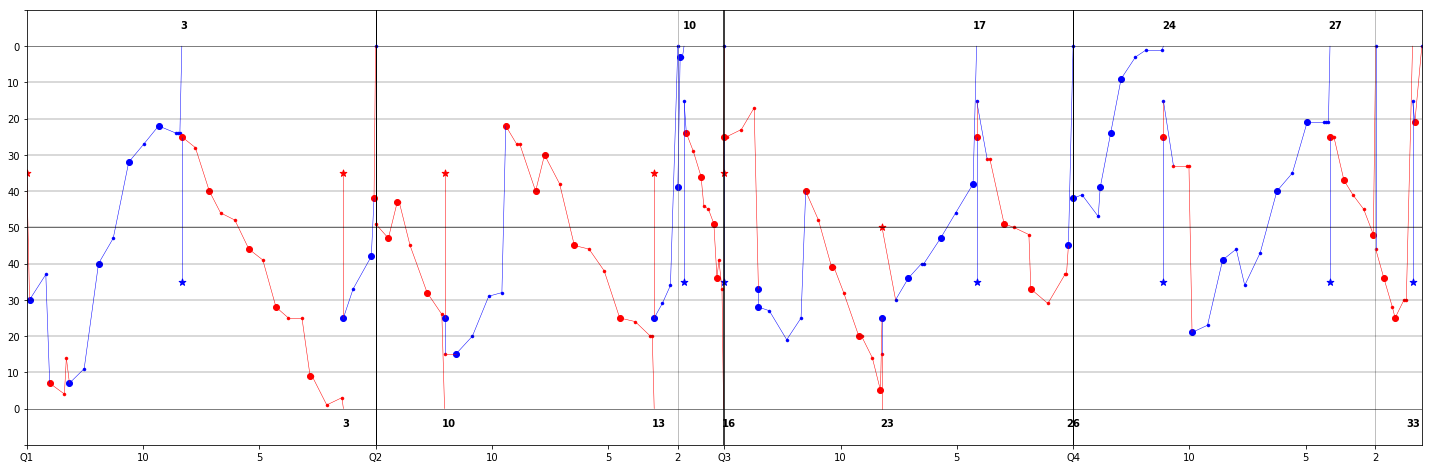

In [21]:
fig, ax = plt.subplots(figsize=(25,8))
plot_game(ax, df)